### Loan Amount Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/loan_train.csv")
df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,...,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,...,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,...,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


In [2]:
print("Info \n", df.info())
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

,count,mean,std,min,25%,50%,75%,max
Age,30000.0,40.092300,16.045129,18.00,25.0000,40.000,55.0000,65.00
Income (USD),25424.0,2630.574417,11262.723830,377.70,1650.4575,2222.435,3090.5925,1777460.21
Loan Amount Request (USD),30000.0,88826.333855,59536.949605,6048.24,41177.7550,75128.075,119964.6050,621497.82
Current Loan Expenses (USD),29828.0,400.936876,242.545375,-999.00,247.6675,375.205,521.2925,3840.88
Dependents,27507.0,2.253027,0.951162,1.00,2.0000,2.000,3.0000,14.00
Credit Score,28297.0,739.885381,72.163846,580.00,681.8800,739.820,799.1200,896.26
No. of Defaults,30000.0,0.193933,0.395384,0.00,0.0000,0.000,0.0000,1.00
Property ID,30000.0,501.934700,288.158086,1.00,251.0000,504.000,751.0000,999.00
Property Age,25150.0,2631.119440,11322.677000,377.70,1650.4500,2223.250,3091.4075,1777460.21
Property Type,30000.0,2.460067,1.118562,1.00,1.0000,2.000,3.0000,4.00


In [3]:
df.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

#### Exploratory Data Analysis

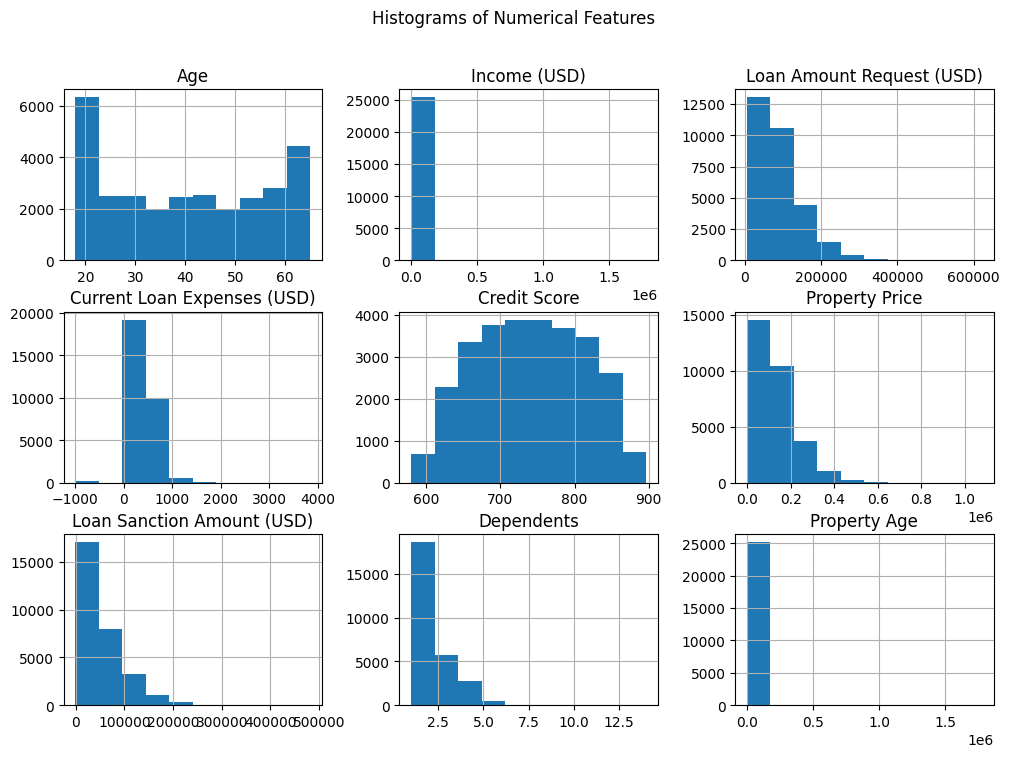

In [4]:
numcols = ['Age', 'Income (USD)', 'Loan Amount Request (USD)',
'Current Loan Expenses (USD)', 'Credit Score',
'Property Price', 'Loan Sanction Amount (USD)','Dependents','Property Age']

df[numcols].hist(figsize=(12,8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

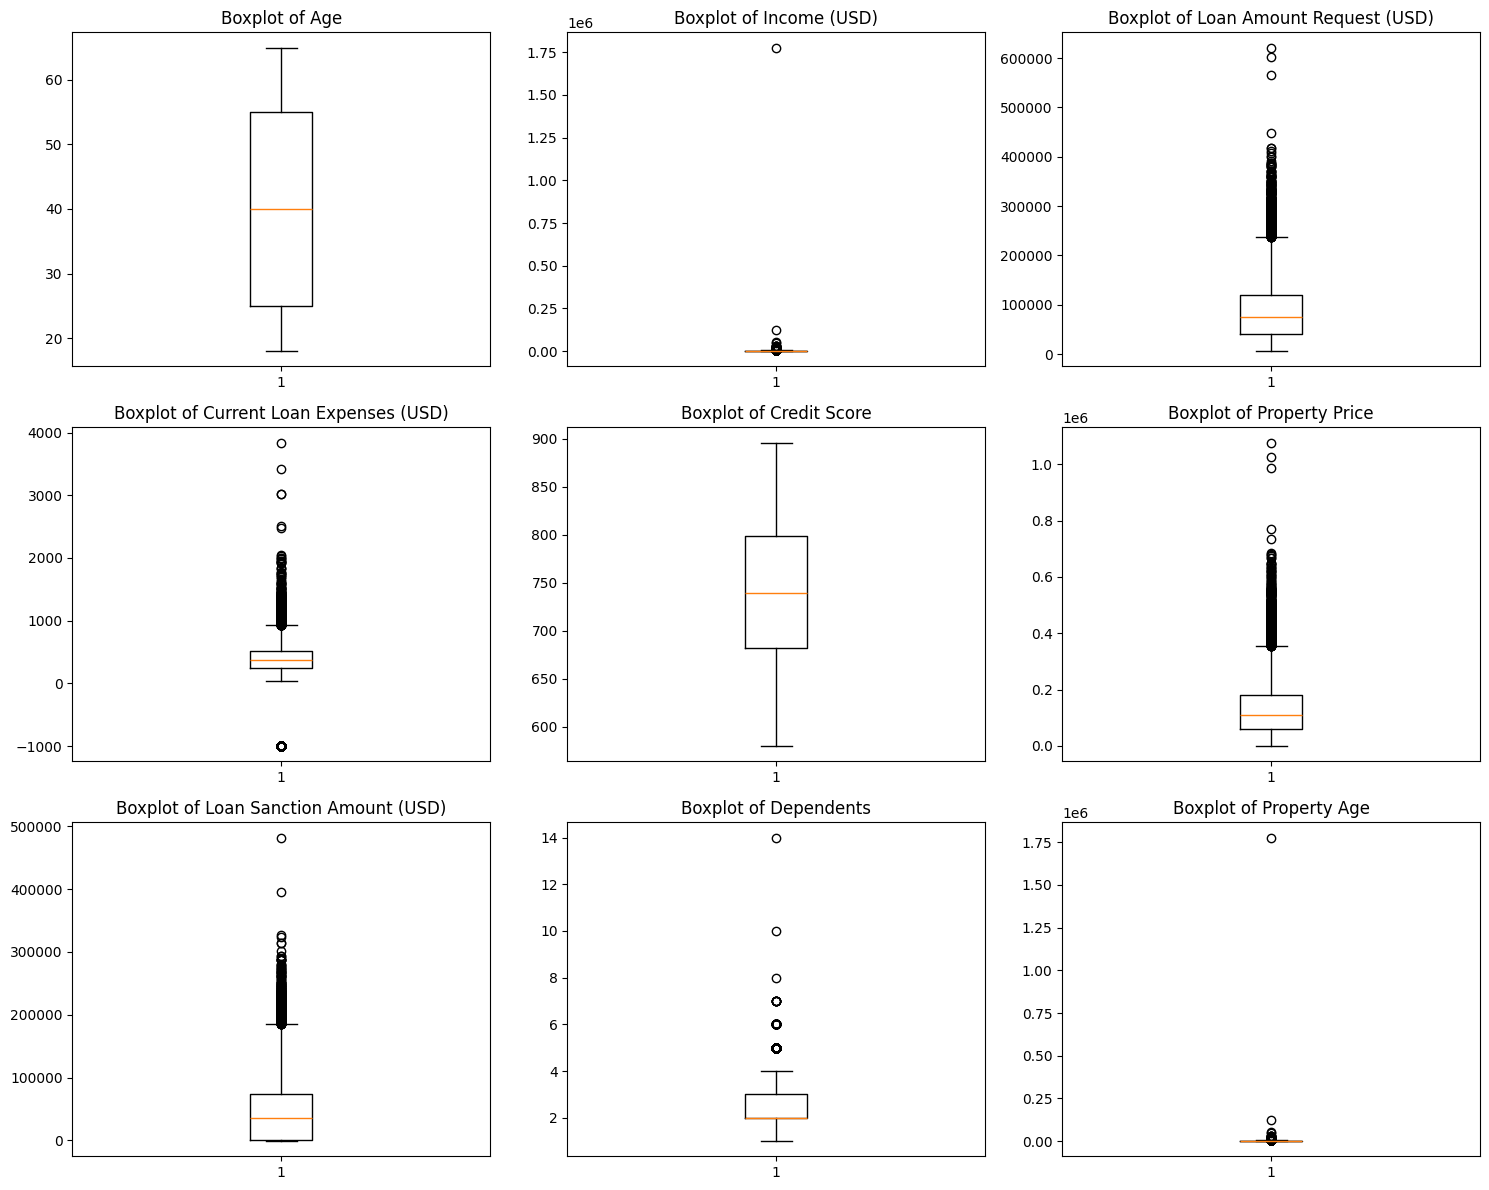

In [5]:
import matplotlib.pyplot as plt

num_cols = [
    'Age', 'Income (USD)', 'Loan Amount Request (USD)',
    'Current Loan Expenses (USD)', 'Credit Score',
    'Property Price', 'Loan Sanction Amount (USD)',
    'Dependents','Property Age'
]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid
axes = axes.flatten()  # flatten to easily loop

for ax, col in zip(axes, num_cols):
    ax.boxplot(df[col].dropna())
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Count')

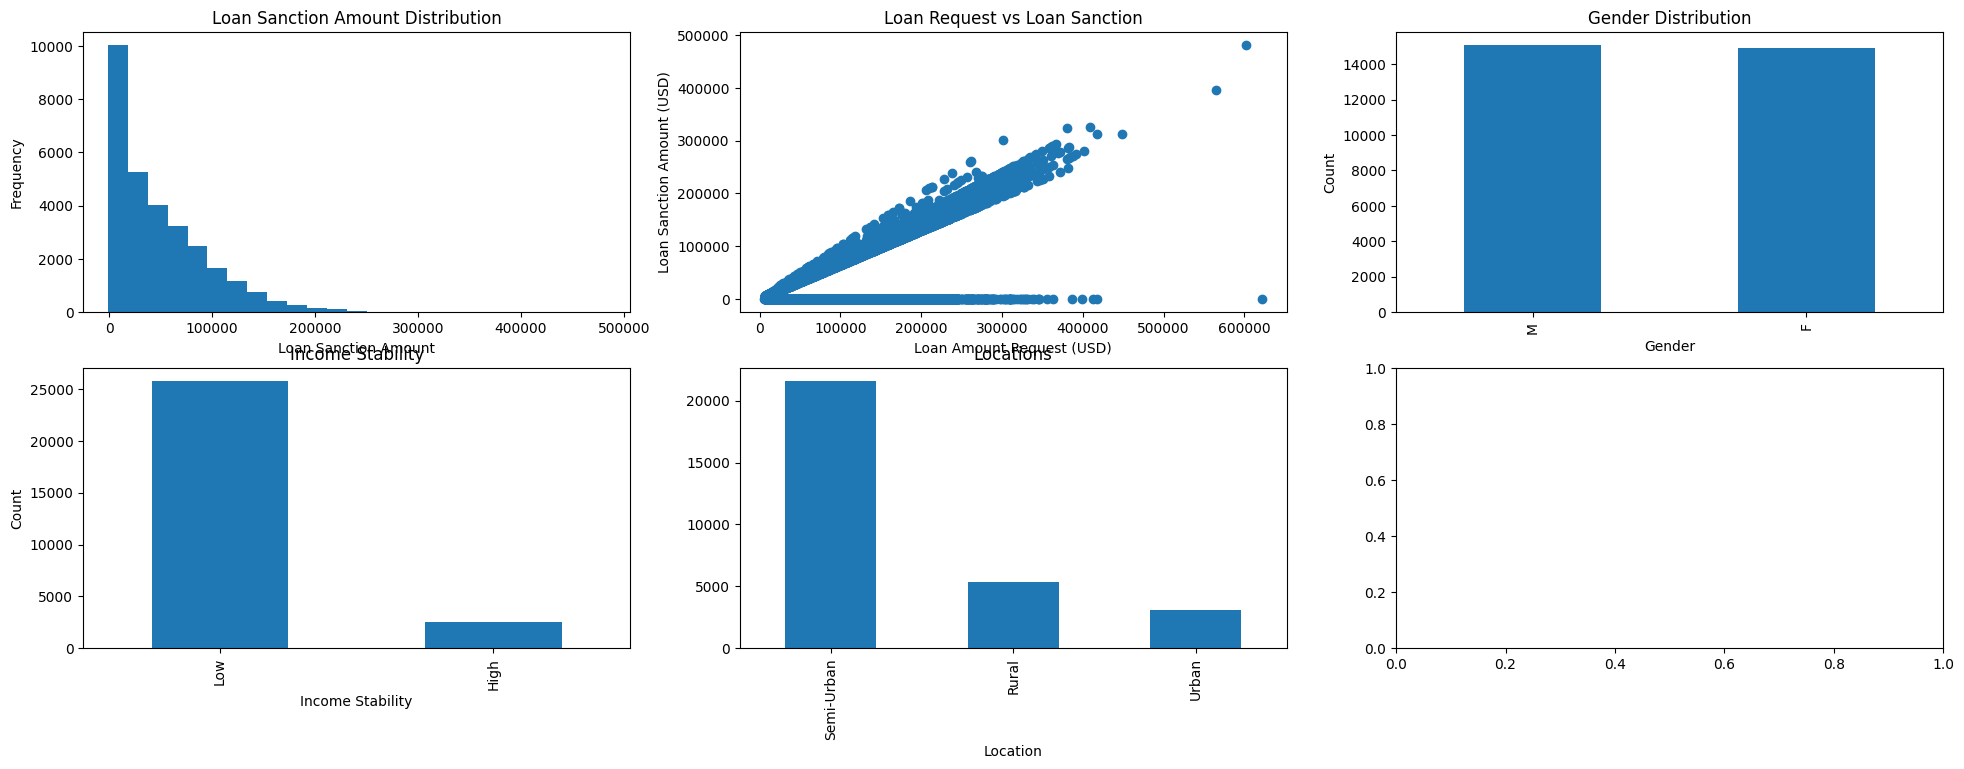

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(24, 8))
axes = axes.flatten()
# Histogram
axes[0].hist(df["Loan Sanction Amount (USD)"], bins=25)
axes[0].set_title("Loan Sanction Amount Distribution")
axes[0].set_xlabel("Loan Sanction Amount")
axes[0].set_ylabel("Frequency")

axes[1].scatter(df["Loan Amount Request (USD)"], df["Loan Sanction Amount (USD)"])
axes[1].set_xlabel("Loan Amount Request (USD)")
axes[1].set_ylabel("Loan Sanction Amount (USD)")
axes[1].set_title("Loan Request vs Loan Sanction")

df["Gender"].value_counts().plot(kind = 'bar', ax = axes[2])
axes[2].set_title("Gender Distribution")
axes[2].set_xlabel("Gender")
axes[2].set_ylabel("Count")

df["Income Stability"].value_counts().plot(kind = 'bar', ax = axes[3])
axes[3].set_title("Income Stability")
axes[3].set_xlabel("Income Stability")
axes[3].set_ylabel("Count")

df["Location"].value_counts().plot(kind = 'bar', ax = axes[4])
axes[4].set_title("Locations")
axes[3].set_ylabel("Count")

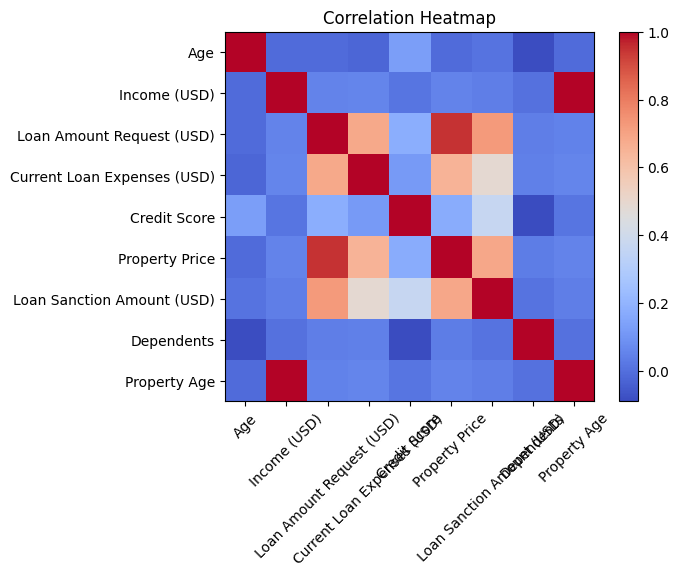

In [7]:
corr = df[numcols].corr()
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

### Iris

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('dataset/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


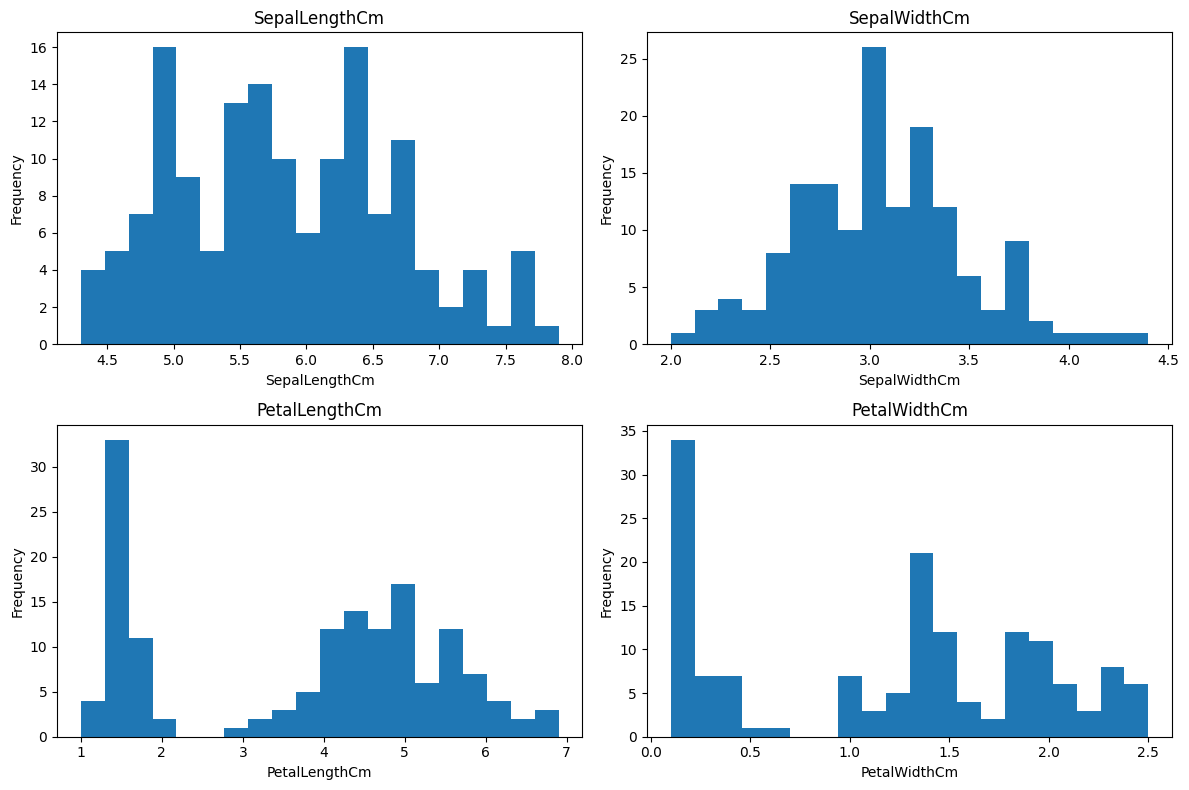

In [10]:
features = [
    'SepalLengthCm',
    'SepalWidthCm',
    'PetalLengthCm',
    'PetalWidthCm'
]

plt.figure(figsize=(12, 8))

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

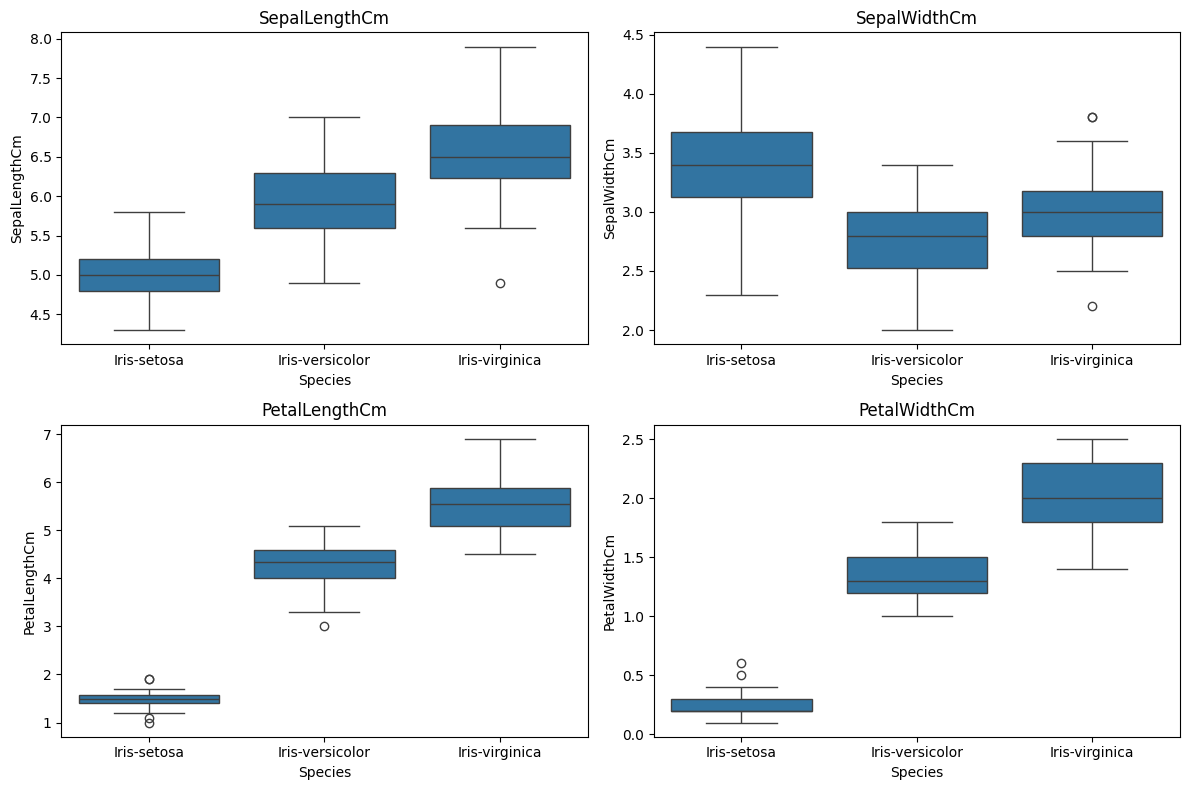

In [11]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=col, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()


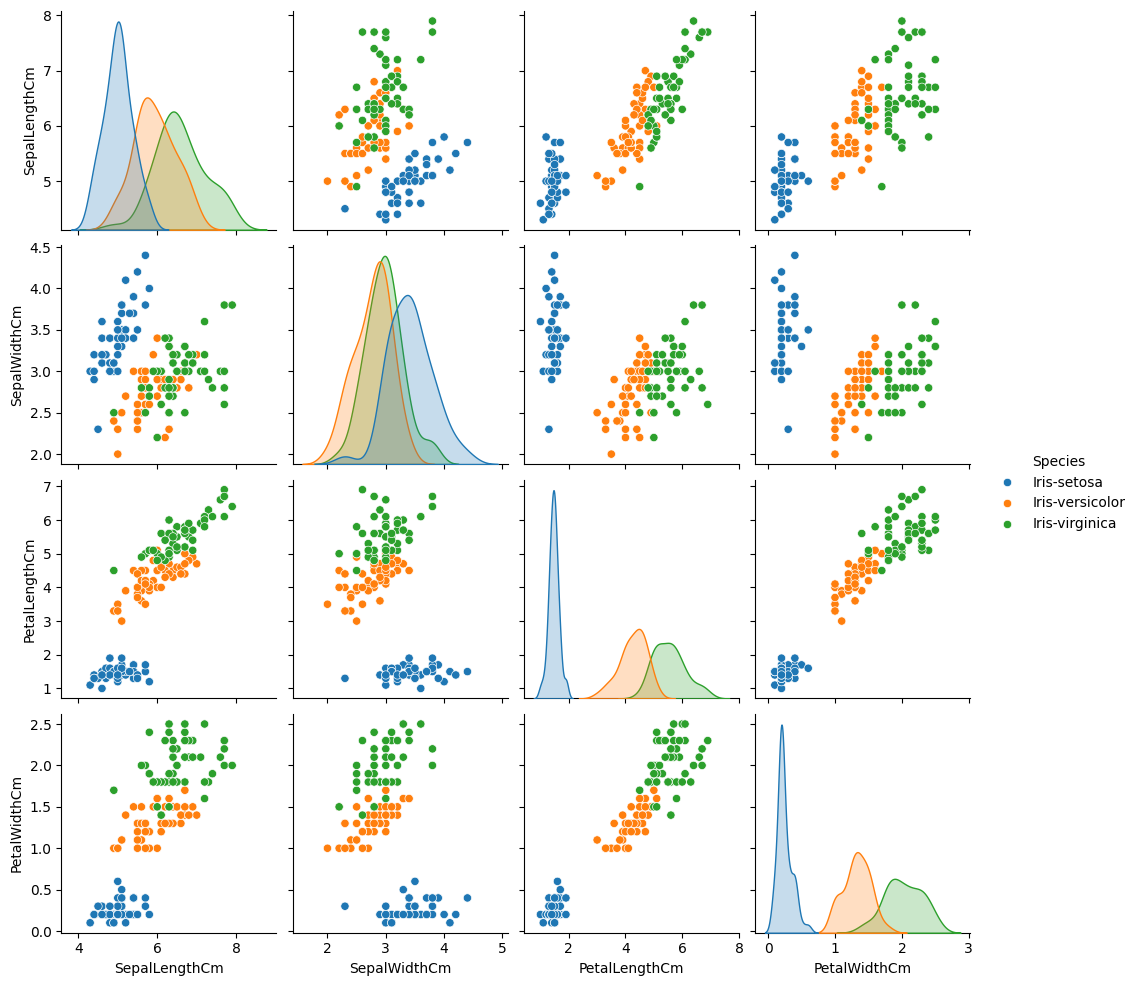

In [12]:
sns.pairplot(df.drop('Id', axis = 1), hue='Species')
plt.show()

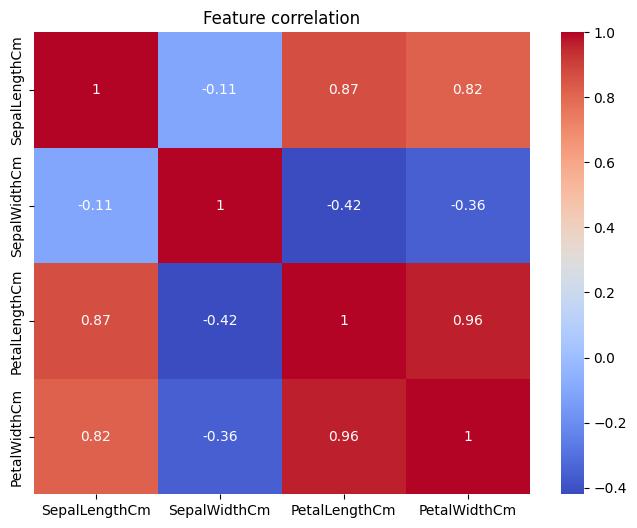

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(['Species', 'Id'], axis=1).corr(),
            annot=True, cmap='coolwarm')
plt.title("Feature correlation")
plt.show()

### Hand Written Character Recognition

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

df = pd.read_csv("datasets/english.csv")

In [46]:
print("Shape:", df.shape)
print("Info\n",df.info())
print("Head\n",df.head())

print(df.isnull().sum())

Shape: (3410, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3410 non-null   object
 1   label   3410 non-null   object
dtypes: object(2)
memory usage: 53.4+ KB
Info
 None
Head
                 image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0
image    0
label    0
dtype: int64


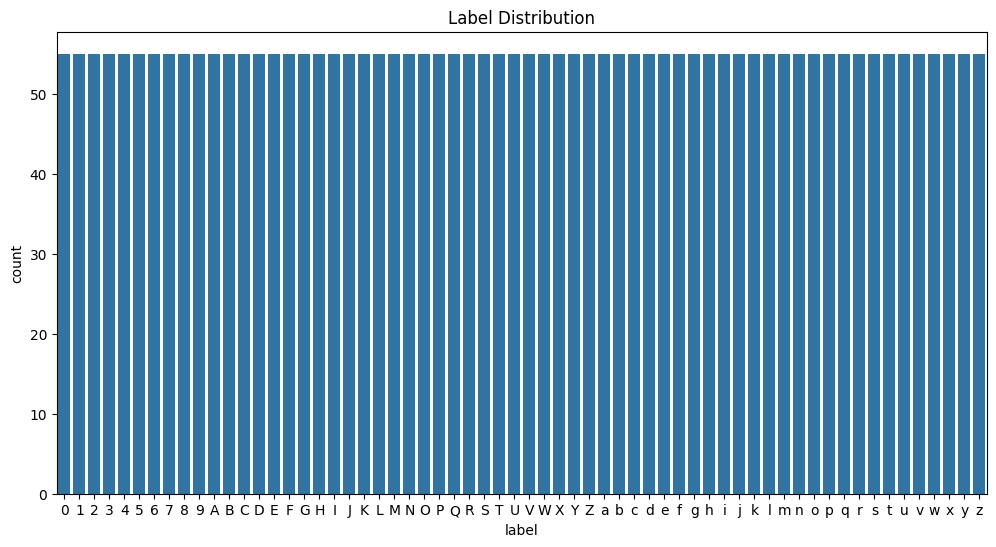

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="label", order=df["label"].value_counts().index)
plt.title("Label Distribution")
plt.show()

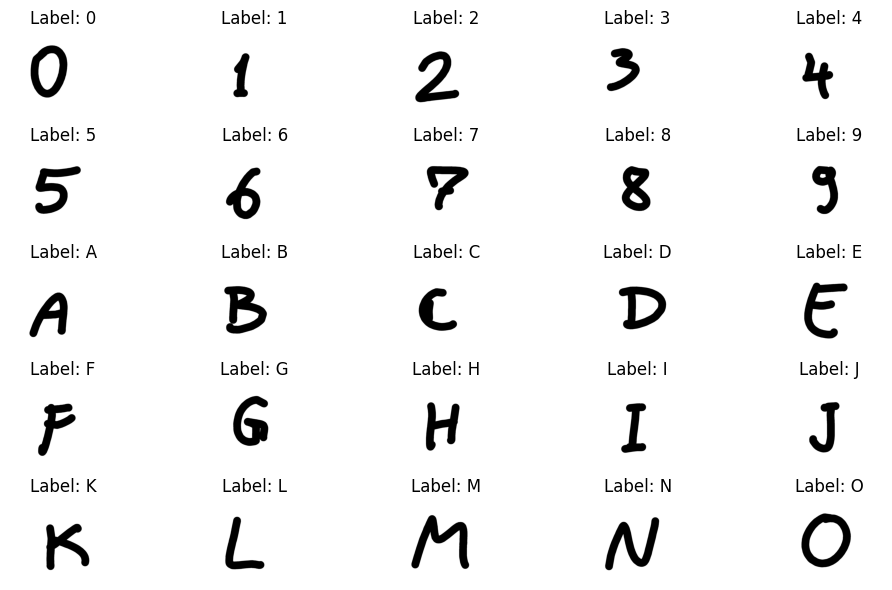

In [48]:
from PIL import Image

plt.figure(figsize=(10, 6))

unique = df.groupby('label').first().reset_index().head(25)

for i, row in unique.iterrows():
    img_path = row['image']
    label = row['label']

    img = Image.open(f"datasets/{img_path}")

    plt.subplot(5, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


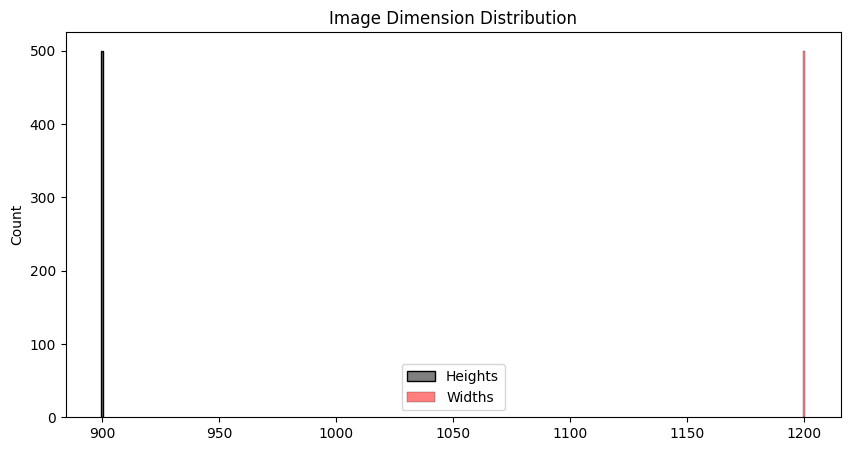

In [49]:
from PIL import Image

heights = []
widths = []

for img_path in df['image'][:500]:   
    img = Image.open(f"datasets/{img_path}")
    w, h = img.size
    widths.append(w)
    heights.append(h)


plt.figure(figsize=(10,5))
sns.histplot(heights, kde=True, color="black", label="Heights")
sns.histplot(widths, kde=True, color="red", label="Widths")
plt.legend()
plt.title("Image Dimension Distribution")
plt.show()

In [14]:
import pandas as pd

df = pd.read_csv("dataset/diabetes.csv")

In [17]:
print("Shape:", df.shape)
print("Info\n", df.info())
df.head()

Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Info
 None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


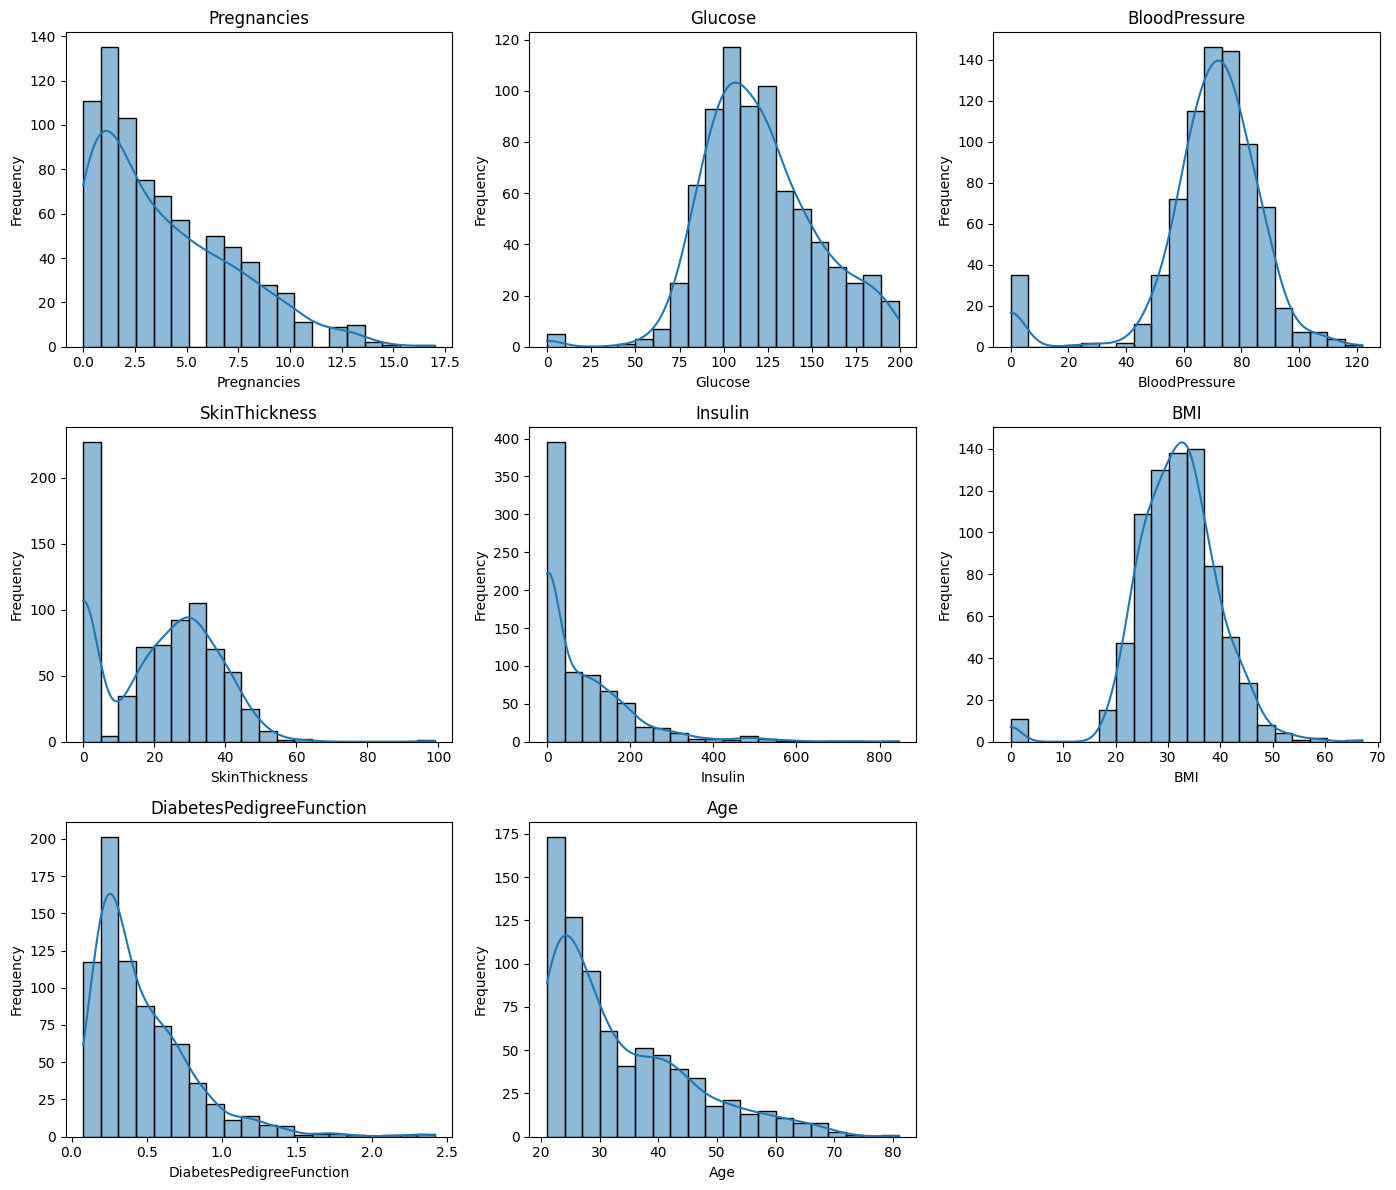

In [20]:
features = df.drop('Outcome', axis=1).columns

plt.figure(figsize=(14, 12))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout() 
plt.show()


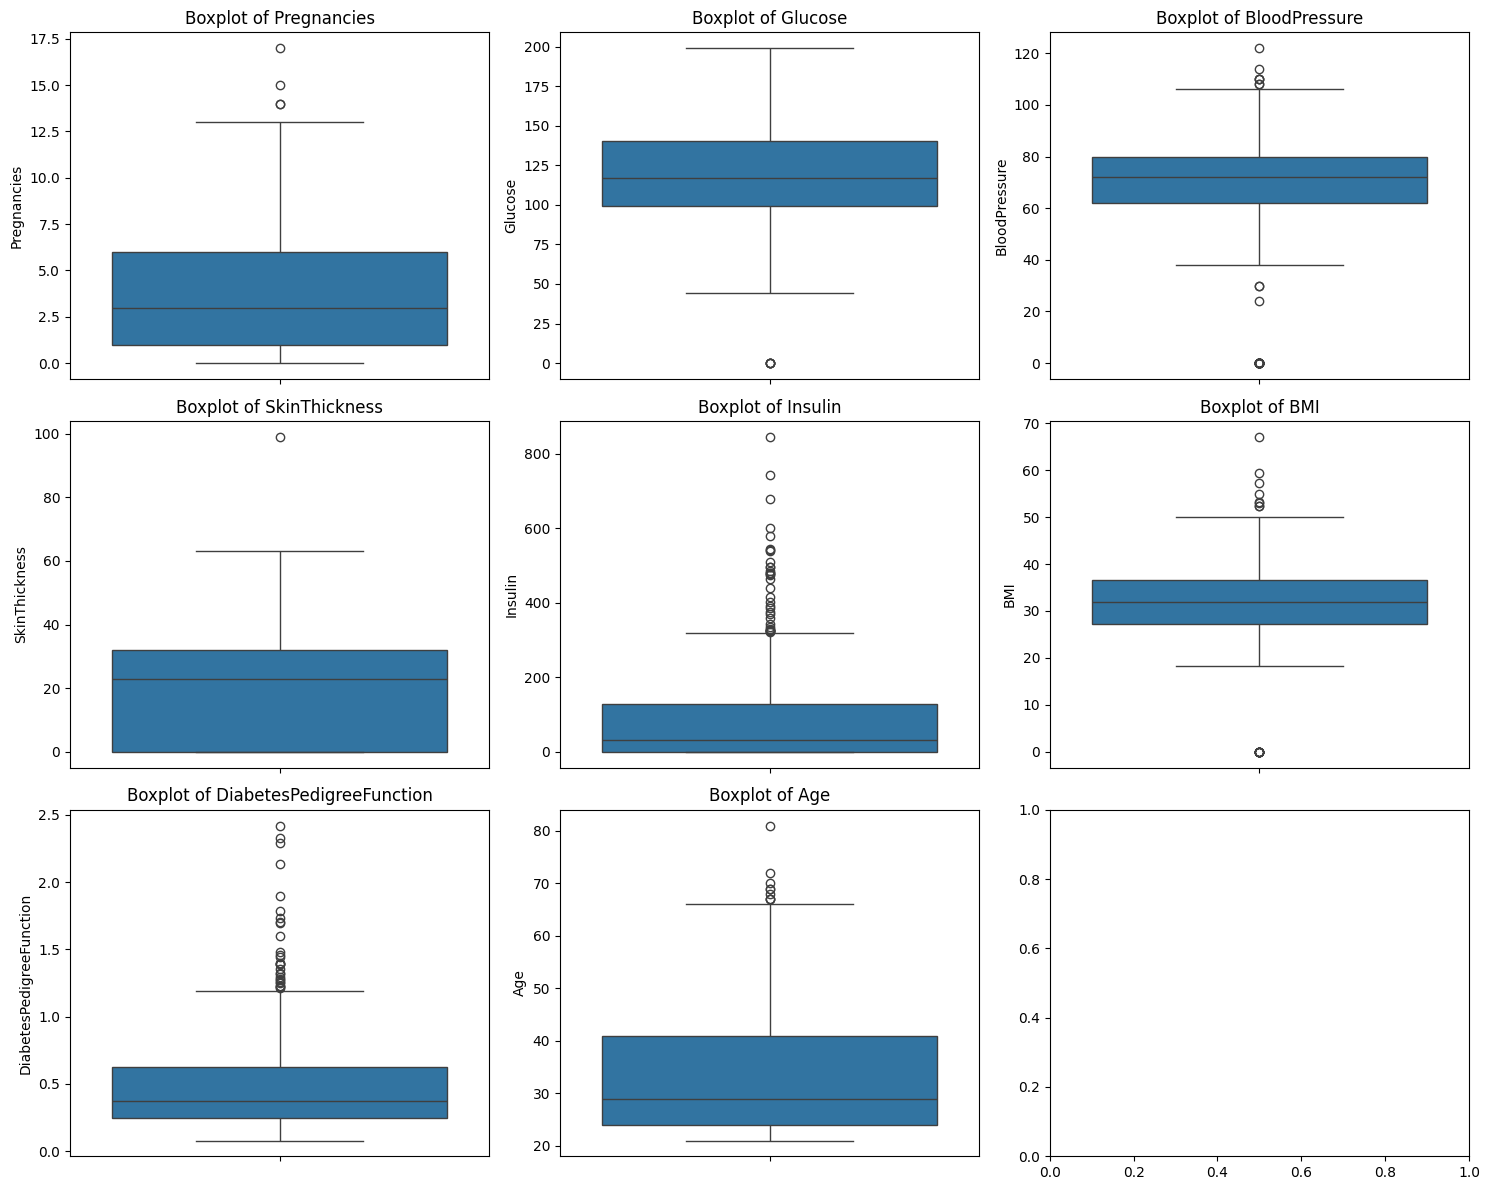

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()  

for i, col in enumerate(features):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')


plt.tight_layout()
plt.show()

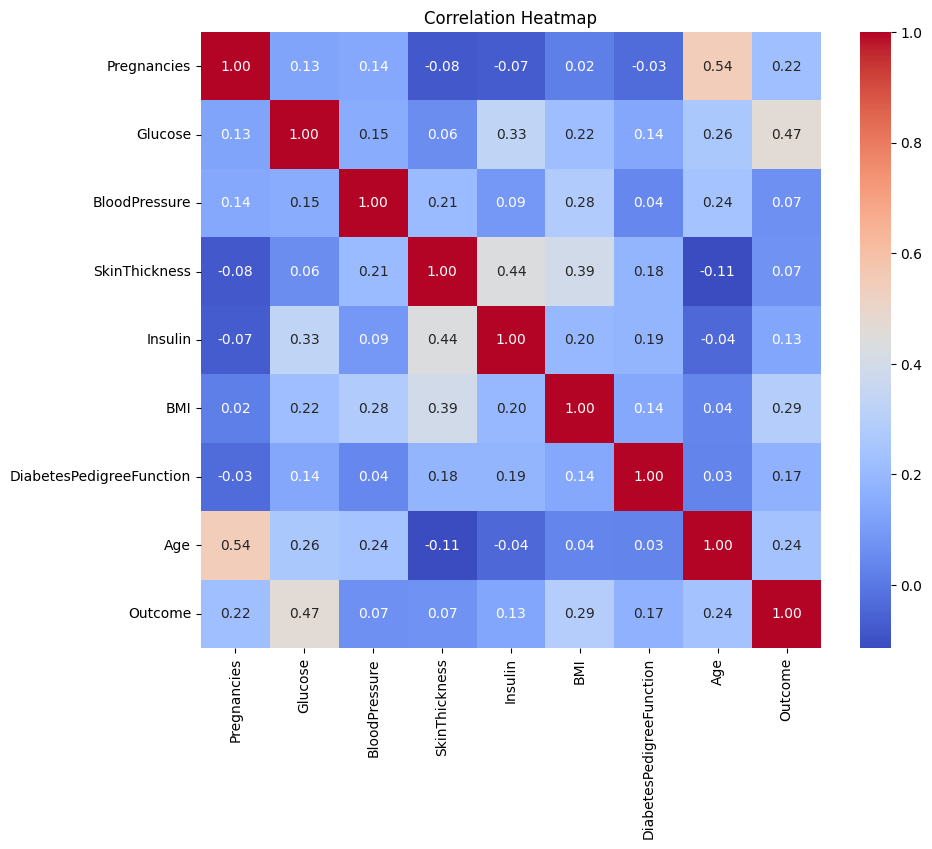

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Email Classification

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
print("Info\n", df.info())
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Info
 None


,count,unique,top,freq
Category,5572,2,ham,4825
Message,5572,5157,"Sorry, I'll call later",30


In [25]:
print("Null Values\n", df.isnull().sum())
print("Counts of spam and Ham \n", df['Category'].value_counts())

Null Values
 Category    0
Message     0
dtype: int64
Counts of spam and Ham 
 Category
ham     4825
spam     747
Name: count, dtype: int64


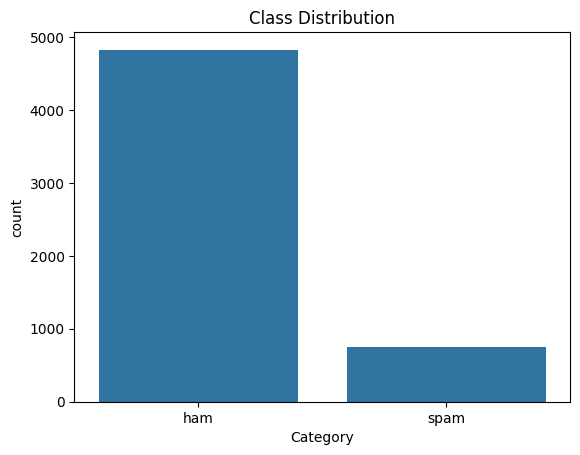

In [26]:
sns.countplot(x='Category', data=df)
plt.title("Class Distribution")
plt.show()

In [27]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df['clean_text'] = df['Message'].apply(clean_text)

In [28]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['clean_text'].apply(len)

In [29]:
df.head()

,Category,Message,clean_text,word_count,char_count
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,20,102
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,23
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,25,124
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,11,43
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,13,59


In [30]:
from collections import Counter

all_words = " ".join(df['clean_text']).split()
common_words = Counter(all_words).most_common(20)
common_words

[('i', 2249),
 ('to', 2248),
 ('you', 2128),
 ('a', 1448),
 ('the', 1331),
 ('u', 1154),
 ('and', 971),
 ('is', 892),
 ('in', 889),
 ('me', 791),
 ('my', 759),
 ('for', 711),
 ('your', 677),
 ('it', 622),
 ('of', 622),
 ('call', 578),
 ('have', 573),
 ('on', 536),
 ('that', 514),
 ('are', 490)]

In [31]:
spam_words = " ".join(df[df['Category']=="spam"]['clean_text']).split()
ham_words = " ".join(df[df['Category']=="ham"]['clean_text']).split()

print("Spam words most common \n\n", Counter(spam_words).most_common(15))
print("\nNot Spam common words \n", Counter(ham_words).most_common(15))

Spam words most common 

 [('to', 686), ('a', 380), ('call', 347), ('you', 287), ('your', 263), ('free', 219), ('for', 204), ('the', 201), ('now', 190), ('or', 188), ('is', 157), ('u', 153), ('txt', 151), ('on', 145), ('ur', 144)]

Not Spam common words 
 [('i', 2195), ('you', 1841), ('to', 1562), ('the', 1130), ('a', 1068), ('u', 1001), ('and', 849), ('in', 817), ('me', 761), ('my', 748), ('is', 735), ('it', 594), ('of', 525), ('for', 507), ('that', 488)]
